In [7]:
def MassSpringDamp(state,t, f):
    # unpack the state vector
    x = state[0]
    xd = state[1]
    # these are our constants
    k = 2.5 # Newtons per metre
    m = 1.5 # Kilograms
    c = 2
#check out how to access args!
    # compute acceleration xdd
    xdd = (-k*x - xd*c)/m + f

    # return the two state derivatives
    return [xd, xdd]


#-------------------------------------#
def reward_func(position, goal):
    #reward = np.exp(-(position-0.6)**2)
    epsilon = 0.01
    if(np.abs(position - goal) > epsilon):
        reward = 1/((position-goal)**2)
    else:
        reward = 10000
        
    return reward


def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

In [11]:
from numpy import random
from scipy.integrate import odeint
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
epsilon = 0.9
gamma = 0.9
alpha = 0.1


dforce = 0.5
dpos = 0.1
force_delta = np.arange(-2,2,dforce)
position = np.arange(0,2,dpos)

q = np.zeros((len(position), len(force_delta)))
goal=0.6
state_goal = find_nearest(position,goal)

state0 = [0.0, 0.0]
t = np.arange(0.0, 20.0, 1)

steps_epoch = []
numEpochs = 1

#save position / force history
position_history = []
force_history = []

#instead of force you have to apply delta_force, otherwise whole model does not make sense!
for i in range(0,numEpochs):
    state = np.where(position == random.choice(position))[0][0]
    #state = random.choice(position)
    count= 0
    force = 0
    print('#### ---- new eppoch: ', i, '---- ####')
    while(round(state,1) != round(state_goal,1)):
        prob = random.rand()
        if(prob <= epsilon):
            action = np.where(force_delta == random.choice(force_delta))[0][0]
            #action = random.choice(force_delta)
            force = force + force_delta[action]
            force = min(force, 4)
            force = max(0, force)

        else:
            action = np.argmax(q[state,:])
            force = force + force_delta[action]
            force = min(force, 4)
            force = max(0, force)
            
        state0 = [position[state],0]
        #temp = odeint(MassSpringDamp, state0, t, (action,))+random.rand()
        temp = odeint(MassSpringDamp, state0, t, (force,))    
        
        next_state = find_nearest(position, round(temp[19,0],2))
        reward = reward_func(position[next_state], goal)
        q[state,action] = q[state, action]+ alpha * (reward + gamma*np.max(q[next_state,:]) - q[state, action])
        state = next_state
        count = count + 1
        position_history.append(position[state])
        force_history.append(force)
        
        #Print out some information
        print('run:',count)
        print('------------')
        print('force_delta: ', force_delta[action])
        print('force: ', force)
        print('reward: ', reward)
        print('position: ', position[state] )
        print('\n')
    steps_epoch.append(count)

#### ---- new eppoch:  0 ---- ####
pos_state:  1.1
next_state:  0
run: 1
------------
force_delta:  -0.5
force:  0
reward:  2.77777777778
position:  0.0


pos_state:  0.0
next_state:  0
run: 2
------------
force_delta:  0.0
force:  0
reward:  2.77777777778
position:  0.0


pos_state:  0.0
next_state:  0
run: 3
------------
force_delta:  -1.0
force:  0
reward:  2.77777777778
position:  0.0


pos_state:  0.0
next_state:  0
run: 4
------------
force_delta:  -2.0
force:  0
reward:  2.77777777778
position:  0.0


pos_state:  0.0
next_state:  3
run: 5
------------
force_delta:  0.5
force:  0.5
reward:  11.1111111111
position:  0.3


pos_state:  0.3
next_state:  0
run: 6
------------
force_delta:  -2.0
force:  0
reward:  2.77777777778
position:  0.0


pos_state:  0.0
next_state:  6
run: 7
------------
force_delta:  1.0
force:  1.0
reward:  10000
position:  0.6




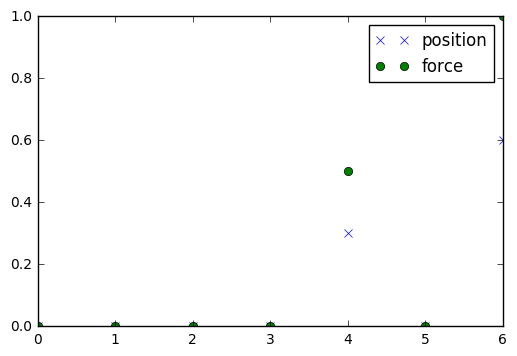

In [12]:
plt.plot(position_history, 'x', label='position')
plt.plot(force_history, 'o', label='force')
plt.legend()
plt.show()

In [5]:
force = 4
state0=[0,0]
result = odeint(MassSpringDamp, state0, t, (force,))
plt.plot(t, result)
plt.legend(['position', 'velocity'])
print(result[9][0])

0


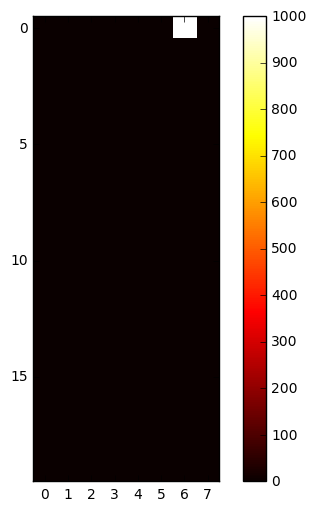

In [13]:
fig = plt.figure(figsize=(6, 6))
plt.imshow(q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.figure(figsize=(3,4))
plt.show()